làm chơi chơi

In [ ]:
import pandas as pd
import networkx as nx

# Đọc dữ liệu từ file CSV (ví dụ như 'cleaned_data.csv')
filtered_data = pd.read_csv('/content/cleaned_data.csv')

# Tạo đồ thị
G = nx.Graph()

# Thêm node Sinh viên với các đặc trưng
students = filtered_data[['mssv', 'namsinh', 'gioitinh', 'drl']].drop_duplicates()
for _, row in students.iterrows():
    G.add_node(row['mssv'], type='student', namsinh=row['namsinh'], gioitinh=row['gioitinh'], drl=row['drl'])

# Thêm node Môn học với các đặc trưng
courses = filtered_data[['mamh', 'sotc']].drop_duplicates()
for _, row in courses.iterrows():
    G.add_node(row['mamh'], type='course', sotc=row['sotc'])

# Thêm cạnh giữa Sinh viên và Môn học với trọng số là điểm tổng kết
edges = filtered_data[['mssv', 'mamh', 'diem_hp']]
for _, row in edges.iterrows():
    G.add_edge(row['mssv'], row['mamh'], weight=row['diem_hp'])

# Thông tin cơ bản về đồ thị
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
node_types = set(nx.get_node_attributes(G, 'type').values())
edge_weights = list(nx.get_edge_attributes(G, 'weight').values())

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Node types: {node_types}")
print(f"Edge weights: {edge_weights}")


<ipython-input-20-7e975c1df747>:5: DtypeWarning: Columns (13,40,41,42,43,44,45,46,47,48,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_data = pd.read_csv('/content/cleaned_data.csv')


Number of nodes: 2262
Number of edges: 78587
Node types: {'student', 'course'}
Edge weights: [2.5, 0.0, 4.5, 6.0, 5.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.3, 9.0, 8.0, 5.5, 6.0, 7.0, 9.0, 7.5, 6.6, 6.6, 6.5, 5.0, 6.0, 7.0, 6.7, 7.5, 8.4, 7.8, 7.6, 3.9, 5.4, 8.0, 5.9, 7.0, 7.0, 6.5, 8.5, 6.9, 5.3, 7.0, 6.3, 6.0, 0.0, 7.0, 6.5, 9.0, 6.5, 6.0, 6.3, 0.0, 9.0, 0.0, 4.0, 0.0, 0.0, 0.0, 0.0, 7.0, 8.0, 9.0, 9.5, 9.0, 8.0, 8.0, 9.5, 7.0, 8.0, 9.5, 8.5, 6.5, 8.0, 8.5, 9.5, 8.6, 9.0, 5.5, 8.5, 7.1, 8.5, 8.5, 7.7, 9.4, 0.0, 8.3, 7.8, 8.5, 8.6, 9.4, 8.3, 8.5, 8.0, 6.4, 8.5, 8.1, 9.5, 8.4, 5.2, 8.0, 7.8, 8.1, 8.0, 7.0, 8.5, 6.5, 8.5, 6.5, 7.0, 8.5, 7.5, 7.5, 9.5, 9.0, 7.5, 8.5, 9.0, 8.0, 9.5, 7.6, 9.0, 6.0, 6.0, 7.1, 9.3, 9.2, 8.8, 8.8, 7.3, 7.4, 7.2, 7.8, 9.4, 8.1, 8.4, 8.1, 9.4, 9.0, 6.5, 9.9, 7.4, 7.8, 9.8, 7.9, 7.3, 9.1, 7.9, 5.5, 8.0, 8.0, 7.0, 5.5, 5.5, 8.5, 5.5, 5.0, 5.0, 7.0, 7.0, 5.0, 8.5, 7.0, 8.0, 6.7, 8.0, 6.5, 6.9, 6.3, 8.9, 5.5, 7.8, 8.2, 6.5, 8.3, 5.8, 6.9, 7.2, 8

In [ ]:
import networkx as nx

# Tạo đồ thị
G = nx.Graph()

# Thêm node Sinh viên với các đặc trưng
students = filtered_data[['mssv', 'namsinh', 'gioitinh', 'drl']].drop_duplicates()
for _, row in students.iterrows():
    G.add_node(row['mssv'], type='student', namsinh=row['namsinh'], gioitinh=row['gioitinh'], drl=row['drl'])

# Thêm node Môn học với các đặc trưng
courses = filtered_data[['mamh', 'sotc']].drop_duplicates()
for _, row in courses.iterrows():
    G.add_node(row['mamh'], type='course', sotc=row['sotc'])

# Thêm cạnh giữa Sinh viên và Môn học với trọng số là điểm tổng kết
edges = filtered_data[['mssv', 'mamh', 'diem_hp']]
for _, row in edges.iterrows():
    G.add_edge(row['mssv'], row['mamh'], weight=row['diem_hp'])

# Tính toán xếp hạng PageRank
pagerank_scores = nx.pagerank(G, weight='weight')

# In ra các điểm xếp hạng
for node, score in pagerank_scores.items():
    print(f"Node: {node}, PageRank Score: {score}")


Node: 31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8, PageRank Score: 9.226906019514856e-05
Node: 599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V, PageRank Score: 0.0002629801580556096
Node: FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3, PageRank Score: 0.000321128360350423
Node: 51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe, PageRank Score: 0.00032440117184820953
Node: 6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE, PageRank Score: 0.0003040834628861371
Node: 2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ, PageRank Score: 0.00029390356496272545
Node: 6AEF2EC0XPvAibaEXe86736b6Ol+/EwtIJHvLVRJ, PageRank Score: 0.00012903931231049226
Node: 6F75613CXPvAibaEXe8/3iNqySORbxrmFjIeDct7, PageRank Score: 0.000341296302152597
Node: 41EBF544XPvAibaEXe8/3iNqySORb+za0yWMmptx, PageRank Score: 0.0003069031184396348
Node: 52A13A56XPvAibaEXe8Y+/3uR2PkTBzKGlmHNdAe, PageRank Score: 0.00035340888650548815
Node: 1DCACA12XPvAibaEXe/XBbLEWRhgQQZvuxC3bpO+, PageRank Score: 0.00033717051902157124
Node: A438E310XPvAibaEXe8VekUw4ELehh5JZ8Xkd+Ce, Pag

In [ ]:
import networkx as nx

# Tạo đồ thị (vẫn giữ lại cấu trúc như đoạn mã trước đó)
G = nx.Graph()

# Thêm node Sinh viên với các đặc trưng
students = filtered_data[['mssv', 'namsinh', 'gioitinh', 'drl']].drop_duplicates()
for _, row in students.iterrows():
    G.add_node(row['mssv'], type='student', namsinh=row['namsinh'], gioitinh=row['gioitinh'], drl=row['drl'])

# Thêm node Môn học với các đặc trưng
courses = filtered_data[['mamh', 'sotc']].drop_duplicates()
for _, row in courses.iterrows():
    G.add_node(row['mamh'], type='course', sotc=row['sotc'])

# Thêm cạnh giữa Sinh viên và Môn học với trọng số là điểm tổng kết
edges = filtered_data[['mssv', 'mamh', 'diem_hp']]
for _, row in edges.iterrows():
    G.add_edge(row['mssv'], row['mamh'], weight=row['diem_hp'])

# Tính toán điểm HITS
authority, hub = nx.hits(G, max_iter=100, tol=1e-06, normalized=True)

# In ra các điểm authority và hub
print("Authority Scores:")
for node, score in authority.items():
    print(f"Node: {node}, Authority Score: {score}")

print("\nHub Scores:")
for node, score in hub.items():
    print(f"Node: {node}, Hub Score: {score}")


Authority Scores:
Node: 31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8, Authority Score: 1.299964655785066e-05
Node: 599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V, Authority Score: 0.0005209864755105074
Node: FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3, Authority Score: 0.0006039412357457232
Node: 51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe, Authority Score: 0.0006038370307239674
Node: 6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE, Authority Score: 0.0005368777611034184
Node: 2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ, Authority Score: 0.0005340797423934504
Node: 6AEF2EC0XPvAibaEXe86736b6Ol+/EwtIJHvLVRJ, Authority Score: 0.0002079828216985576
Node: 6F75613CXPvAibaEXe8/3iNqySORbxrmFjIeDct7, Authority Score: 0.0006471365723596326
Node: 41EBF544XPvAibaEXe8/3iNqySORb+za0yWMmptx, Authority Score: 0.0005574740943971432
Node: 52A13A56XPvAibaEXe8Y+/3uR2PkTBzKGlmHNdAe, Authority Score: 0.000677692811217452
Node: 1DCACA12XPvAibaEXe/XBbLEWRhgQQZvuxC3bpO+, Authority Score: 0.0006278997103480063
Node: A438E310XPvAibaEXe8V

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np


# 1. Load Data
diemrl_df = pd.read_csv("/content/diemrl.csv", encoding="utf-8").drop_duplicates()
diemthu_df = pd.read_csv("/content/diemthu.csv", encoding="utf-8").drop_duplicates()
sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()

# 2. Check and Clean Column Names
diemrl_df.columns = diemrl_df.columns.str.strip()
diemthu_df.columns = diemthu_df.columns.str.strip()
sinhvien_df.columns = sinhvien_df.columns.str.strip()

# 3. Data Cleaning
# Ensure 'drl' exists in diemrl_df
if "drl" not in diemrl_df.columns:
    raise KeyError("Cột 'drl' không tồn tại trong diemrl_df. Vui lòng kiểm tra dữ liệu!")
diemrl_df = diemrl_df.dropna(subset=["drl"])

# Ensure necessary columns exist in other DataFrames
required_columns_diemthu = ["mssv", "diem_hp"]
required_columns_sinhvien = ["mssv"]
for col in required_columns_diemthu:
    if col not in diemthu_df.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong diemthu_df!")
for col in required_columns_sinhvien:
    if col not in sinhvien_df.columns:
        raise KeyError(f"Cột '{col}' không tồn tại trong sinhvien_df!")

# Remove rows with missing values
diemthu_df = diemthu_df.dropna(subset=required_columns_diemthu)
sinhvien_df = sinhvien_df.dropna(subset=required_columns_sinhvien)

# Merge dataframes on 'mssv'
data = pd.merge(diemthu_df, diemrl_df, on="mssv", how="inner")
data = pd.merge(data, sinhvien_df, on="mssv", how="inner")

# Select features and target
available_features = [col for col in ["drl", "sotc", "namhoc", "hocky"] if col in data.columns]
if len(available_features) < 1:
    raise ValueError("Không có cột nào trong 'features' tồn tại trong dữ liệu!")
target = "diem_hp"
if target not in data.columns:
    raise KeyError(f"Cột '{target}' không tồn tại trong dữ liệu!")

# Drop rows with missing values in selected features/target
data = data.dropna(subset=available_features + [target])

X = data[available_features]
y = data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Build the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2

<ipython-input-5-3b2477c408b0>:13: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()


(2.3165774398549615, 1.7550669516171074, 0.12776080246884713)

#***Undirected graph***

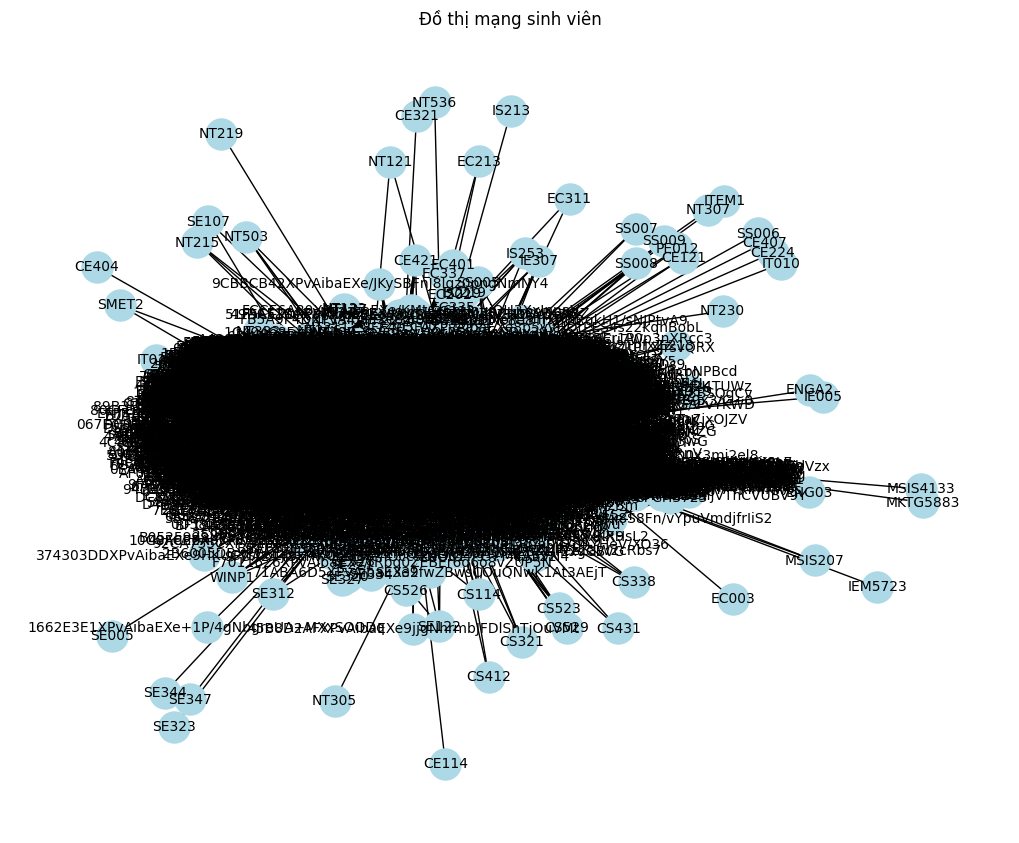

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Tạo một đồ thị từ dữ liệu
G = nx.Graph()

# Ví dụ: Tạo nút cho từng sinh viên
students = data['mssv'].unique()
G.add_nodes_from(students)

# Ví dụ: Thêm cạnh (edges) dựa trên môn học chung
for _, row in data.iterrows():
    G.add_edge(row['mssv'], row['mamh'], label="course")

# Vẽ đồ thị
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color="lightblue", font_size=10, node_size=500)
plt.title("Đồ thị mạng sinh viên")
plt.show()


In [ ]:
# Số lượng nút và cạnh
print("Số lượng nút:", G.number_of_nodes())
print("Số lượng cạnh:", G.number_of_edges())

# Độ liên kết (degree) của các nút
degree = dict(G.degree())
print("Độ liên kết của các nút:", degree)

# Tính hệ số clustering
clustering = nx.clustering(G)
print("Hệ số clustering:", clustering)


Số lượng nút: 2262
Số lượng cạnh: 78587
Độ liên kết của các nút: {'31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8': 16, '599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V': 47, 'FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3': 44, '51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe': 44, '6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE': 45, '2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ': 49, '6AEF2EC0XPvAibaEXe86736b6Ol+/EwtIJHvLVRJ': 20, '6F75613CXPvAibaEXe8/3iNqySORbxrmFjIeDct7': 44, '41EBF544XPvAibaEXe8/3iNqySORb+za0yWMmptx': 44, '52A13A56XPvAibaEXe8Y+/3uR2PkTBzKGlmHNdAe': 44, '1DCACA12XPvAibaEXe/XBbLEWRhgQQZvuxC3bpO+': 44, 'A438E310XPvAibaEXe8VekUw4ELehh5JZ8Xkd+Ce': 44, '57203F91XPvAibaEXe9JDlHA4z2GHFHVJ5vTRj7d': 44, '29430069XPvAibaEXe+TFgEDwYNnvUaz/ItEjR3K': 44, '007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6': 44, 'DEC271BCXPvAibaEXe8WD3qnVG2b/XsMiSHc1tc+': 40, '6F056D09XPvAibaEXe8WD3qnVG2b/T+8k+BG8W0+': 44, 'A51D3E41XPvAibaEXe/uH+ehSKMSjcnvclj+jKaO': 26, '39D76A4EXPvAibaEXe8Cym7B6GX+Tt/q64ZsOx/+': 51, '082CA1BDXPvAibaEXe9h4

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
print("Cộng đồng:", communities)


Cộng đồng: [frozenset({'97C2C03FXPvAibaEXe+PhKfQb0+XJ2fDNXQs9az5', '7823E9EEXPvAibaEXe+ltCXpm838vbH4otiiAQCO', 'FAFF75E9XPvAibaEXe+PmhPN+9CWc84hybaXGofC', 'FB5A9F4DXPvAibaEXe8zt9d6Yn9pDM6R1fhHTj76', 'A65738B9XPvAibaEXe9U/K5zYZONT7oYmwa/1iSH', 'F885079BXPvAibaEXe/HrmBtV6rChoted20VCh1b', 'AE749C00XPvAibaEXe+iXJpjy6UOMCMmEsf/qq+R', '40F7E8D0XPvAibaEXe+nZBq3b0XEhfcwXLmoc4Pj', '974A34BBXPvAibaEXe/69hWWh+JD2QCDBWzwCu7W', '72360A9BXPvAibaEXe/MCL0qpDhx02jhOyfNsnRm', 'CS113', '6EB4408FXPvAibaEXe+cD1fKElqxL06nWB8JXnUx', '79402081XPvAibaEXe/S5mChdnrLm7k8XUjNyRr/', '65774F58XPvAibaEXe8e/5ryJ9YpuX/hEkT6zPR/', 'BEF82D76XPvAibaEXe+sfU1lcH9y35HnL8Rbs6ER', 'EB87A112XPvAibaEXe+yU1j0ocViqSbXKj24nkqQ', 'CS222', 'B6BE9570XPvAibaEXe/NExuU8f5CHzM46oj4x6pe', '3622E58BXPvAibaEXe9lF2o7VejWNjkH+xdoXpbr', 'CS301', '12611C99XPvAibaEXe+5f3nhbX2ehzcDuHScafUQ', 'DC3809C1XPvAibaEXe+suUpvSAu/oxffaDJ7qIWv', '47BABEDFXPvAibaEXe/FWKstHRRDnf6JBFMtxUeH', 'CS105', 'ENG03', 'FF1F91C6XPvAibaEXe9QJDM9nE85iG8enJ2bG8BP', '221BC6F

In [ ]:
centrality = nx.degree_centrality(G)
print("Độ trung tâm của các nút:", centrality)


Độ trung tâm của các nút: {'31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8': 0.007076514816452897, '599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V': 0.020787262273330387, 'FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3': 0.019460415745245468, '51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe': 0.019460415745245468, '6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE': 0.019902697921273773, '2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ': 0.021671826625386997, '6AEF2EC0XPvAibaEXe86736b6Ol+/EwtIJHvLVRJ': 0.008845643520566122, '6F75613CXPvAibaEXe8/3iNqySORbxrmFjIeDct7': 0.019460415745245468, '41EBF544XPvAibaEXe8/3iNqySORb+za0yWMmptx': 0.019460415745245468, '52A13A56XPvAibaEXe8Y+/3uR2PkTBzKGlmHNdAe': 0.019460415745245468, '1DCACA12XPvAibaEXe/XBbLEWRhgQQZvuxC3bpO+': 0.019460415745245468, 'A438E310XPvAibaEXe8VekUw4ELehh5JZ8Xkd+Ce': 0.019460415745245468, '57203F91XPvAibaEXe9JDlHA4z2GHFHVJ5vTRj7d': 0.019460415745245468, '29430069XPvAibaEXe+TFgEDwYNnvUaz/ItEjR3K': 0.019460415745245468, '007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6': 0.019

In [ ]:
import networkx as nx
# Áp dụng thuật toán PageRank
pagerank_scores = nx.pagerank(G, weight='weight')

# Hiển thị kết quả PageRank
pagerank_sorted = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
print("PageRank Scores:")
for student, score in pagerank_sorted:
    print(f"{student}: {score:.4f}")

PageRank Scores:
PE001: 0.0116
SS001: 0.0112
PH001: 0.0112
MA003: 0.0112
MA001: 0.0112
IT001: 0.0112
PE002: 0.0110
EN001: 0.0109
IT003: 0.0107
MA002: 0.0106
SS002: 0.0105
IT002: 0.0104
EN002: 0.0102
SS003: 0.0101
IT006: 0.0101
IT004: 0.0101
MA004: 0.0100
IT005: 0.0100
IT009: 0.0099
MA005: 0.0096
SS004: 0.0096
IT007: 0.0095
EN003: 0.0089
PH002: 0.0074
SE104: 0.0054
PH003: 0.0049
NT118: 0.0038
IS208: 0.0035
IS201: 0.0034
SE330: 0.0029
ENBT: 0.0029
NT106: 0.0024
IT008: 0.0024
NT101: 0.0023
SE114: 0.0023
IS207: 0.0022
NT104: 0.0022
NT111: 0.0022
NT114: 0.0021
SE310: 0.0021
SE101: 0.0020
NT115: 0.0020
SE102: 0.0020
NT334: 0.0020
SE106: 0.0020
NT105: 0.0020
SE108: 0.0019
SE100: 0.0019
SE109: 0.0019
SE111: 0.0018
SE214: 0.0018
CS106: 0.0018
SE112: 0.0018
SE215: 0.0018
SE501: 0.0017
CS221: 0.0017
CS112: 0.0017
CS111: 0.0017
CS110: 0.0017
NT330: 0.0016
IS353: 0.0015
SE346: 0.0015
CE101: 0.0015
NT113: 0.0015
CE119: 0.0015
CE118: 0.0015
IS336: 0.0015
CE103: 0.0015
NT109: 0.0014
CE104: 0.0014
NT13

In [ ]:
import networkx as nx

# Áp dụng thuật toán HITS
hits_scores = nx.hits(G, max_iter=100, tol=1e-8)

# Lấy kết quả hub và authority scores
hubs, authorities = hits_scores

# Hiển thị kết quả HITS (Hub và Authority)
hubs_sorted = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
authorities_sorted = sorted(authorities.items(), key=lambda x: x[1], reverse=True)

print("Hub Scores (Sinh viên có ảnh hưởng lớn nhất):")
for student, score in hubs_sorted:
    print(f"{student}: {score:.4f}")

print("\nAuthority Scores (Sinh viên có tầm ảnh hưởng lớn nhất):")
for student, score in authorities_sorted:
    print(f"{student}: {score:.4f}")

Hub Scores (Sinh viên có ảnh hưởng lớn nhất):
PE001: 0.0089
PH001: 0.0089
MA003: 0.0089
MA001: 0.0089
IT001: 0.0089
SS001: 0.0088
IT003: 0.0088
EN001: 0.0088
PE002: 0.0088
MA002: 0.0088
IT002: 0.0087
IT006: 0.0086
SS002: 0.0086
IT004: 0.0086
MA004: 0.0086
IT005: 0.0086
EN002: 0.0085
IT009: 0.0085
SS003: 0.0085
MA005: 0.0084
IT007: 0.0083
SS004: 0.0083
EN003: 0.0078
PH002: 0.0062
SE104: 0.0049
PH003: 0.0039
NT118: 0.0034
IS201: 0.0031
IS208: 0.0031
SE330: 0.0026
ENBT: 0.0022
IT008: 0.0022
NT106: 0.0021
SE114: 0.0021
NT101: 0.0021
NT104: 0.0019
NT111: 0.0019
SE310: 0.0019
IS207: 0.0019
SE101: 0.0019
SE102: 0.0019
NT114: 0.0018
SE106: 0.0018
SE108: 0.0018
NT115: 0.0018
SE100: 0.0018
SE109: 0.0018
NT334: 0.0018
NT105: 0.0018
SE111: 0.0017
SE214: 0.0017
SE112: 0.0017
SE215: 0.0017
SE501: 0.0016
CS106: 0.0014
SE346: 0.0014
NT330: 0.0014
CS221: 0.0014
CS112: 0.0014
CS111: 0.0013
CS110: 0.0013
NT113: 0.0013
IS353: 0.0013
SE325: 0.0013
NT109: 0.0013
CE101: 0.0013
NT402: 0.0013
CE119: 0.0013
NT1

#***Multigraph***

<ipython-input-12-68cce20346df>:8: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()


                                       mssv    mamh
0  31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8  CS1113
1  31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8  CS1113
2  31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8  CS1113
3  31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8  CS1113
4  31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8   PH001
Số lượng sinh viên học môn học CS1113: 1996


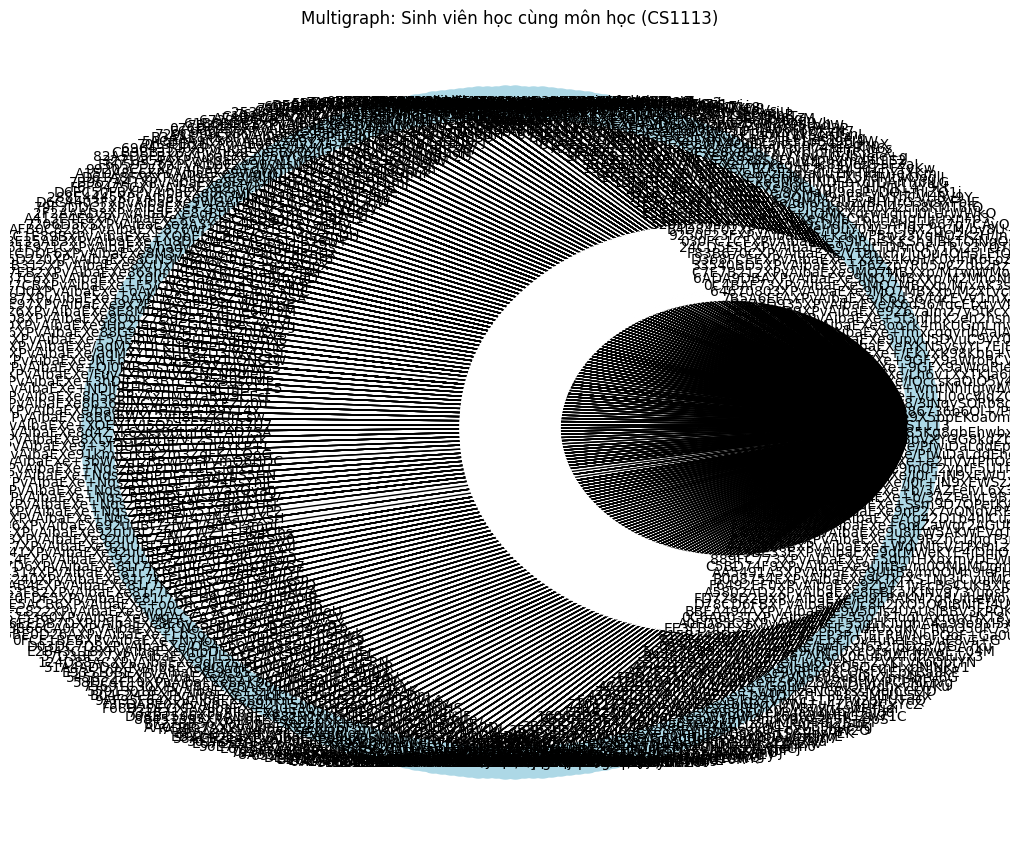

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load Data
diemrl_df = pd.read_csv("/content/diemrl.csv", encoding="utf-8").drop_duplicates()
diemthu_df = pd.read_csv("/content/diemthu.csv", encoding="utf-8").drop_duplicates()
sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()

# Merge dữ liệu (nếu chưa làm)
data = pd.merge(diemthu_df, diemrl_df, on="mssv", how="inner")
data = pd.merge(data, sinhvien_df, on="mssv", how="inner")

# Kiểm tra cột 'mamh' (môn học)
print(data[['mssv', 'mamh']].head())

# Chọn một phần của dữ liệu (ví dụ: chỉ những sinh viên học môn học cụ thể)
selected_courses = data[data['mamh'] == 'CS1113']  # Chọn một môn học cụ thể (ví dụ: CS1113)
print(f"Số lượng sinh viên học môn học CS1113: {selected_courses.shape[0]}")

# Tạo Multigraph chỉ với các sinh viên học cùng môn học
G_multigraph = nx.MultiGraph()

# Thêm các cạnh giữa các sinh viên học cùng môn
for _, row in selected_courses.iterrows():
    G_multigraph.add_edge(row['mssv'], row['mamh'], label="same_course")

# Vẽ Multigraph
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G_multigraph)  # Thử layout vòng tròn thay vì spring_layout
nx.draw(G_multigraph, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G_multigraph, pos, edge_labels={(u, v): d["label"] for u, v, d in G_multigraph.edges(data=True)})
plt.title("Multigraph: Sinh viên học cùng môn học (CS1113)")
plt.show()


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G_multigraph))
print("Cộng đồng:", communities)


Cộng đồng: [frozenset({'5290B038XPvAibaEXe/Yg42D1b4hlCuZfPhzi9Yj', 'EE84609CXPvAibaEXe+SgbKufUiN7G6cFGP9m7xj', '61B6BDB1XPvAibaEXe81w9eVvyp+l9cB1MMQE68y', '344492BBXPvAibaEXe+KnWgScvZ27B5HVLUYfH4H', '7206D5F5XPvAibaEXe9A3Yjgh4iPfoR9IX7yh3fv', '557392BEXPvAibaEXe8x8S8Fn/vYpuVmdjfrIiS2', '56E7FAE5XPvAibaEXe99QzhWW+eTfNCCUP+o8uVq', '0C6A6031XPvAibaEXe+55g1kTuqhAxmrxHxT8ysJ', 'F6059576XPvAibaEXe99yNsueYx+seyUo79Ylb6Y', 'AA0D4C7AXPvAibaEXe/EKiY6F5FD8MzoUuRQ2m2D', '86053F82XPvAibaEXe81r7KrCH0uc8qhbnpGNt/A', '431B54F6XPvAibaEXe/9XMaU/9dsPyDQ+jhIZQ1j', 'F41DD86AXPvAibaEXe+3bWVxnzRRwPoFPvmQ6HDC', 'DE67562FXPvAibaEXe8b36blNCVkledWAXEZlz0d', 'BCB10D47XPvAibaEXe92uUBt7zfwrfm+6m0Wsyvl', 'A5802AD2XPvAibaEXe8IsBka/KfNv973YupsPbqM', '06B78A83XPvAibaEXe+b/3AZFelvL6x33ODd3+Y5', '301F53B1XPvAibaEXe8VQgmAEjfeNvXqKmbT4qV3', '173BE33EXPvAibaEXe9drMWeKYE4jDnjOpqbJSA/', '2850C99FXPvAibaEXe8XLyAGr26H4/VLzSonUuXk', 'E6729F7AXPvAibaEXe8XtTI6VHhlKCQByb9R31yq', '03F0FDF5XPvAibaEXe81r7KrCH0uc/DWUtJIS0l8', '31D5D488

In [ ]:
centrality = nx.degree_centrality(G_multigraph)
print("Độ trung tâm của các nút:", centrality)


Độ trung tâm của các nút: {'31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8': 0.028070175438596492, 'CS1113': 7.003508771929825, '91C557BBXPvAibaEXe9X5bpEKoa0mhzvi3xnxIFE': 0.031578947368421054, '7259E977XPvAibaEXe86736b6Ol+/PreEMY8ftS4': 0.031578947368421054, 'FFDFD671XPvAibaEXe8/3iNqySORb8gPuwsQ8fwa': 0.02456140350877193, 'DEA3783EXPvAibaEXe+yU1j0ocViqZOr0fWYBAOj': 0.03508771929824561, '08890FF6XPvAibaEXe+wmtNhlfgIwlWvQAJnsgPn': 0.031578947368421054, '91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu': 0.03859649122807018, '2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM': 0.03508771929824561, 'A98AEF88XPvAibaEXe+9GFX9aWroRIeYEl1R5BEu': 0.03508771929824561, 'CFC99863XPvAibaEXe+9GFX9aWroRCVdw61ieVzx': 0.0912280701754386, 'A23C1291XPvAibaEXe+/EkvXK98Kbb+VMYyY03py': 0.021052631578947368, 'AB4D8F99XPvAibaEXe/YKN5ysyYL7EjErJAJK5l+': 0.031578947368421054, '96967470XPvAibaEXe9upvU5DvuC9vY0bll+Ov+G': 0.03508771929824561, '0CBE4487XPvAibaEXe+fmxcqgvribAaiAPDGKOrx': 0.031578947368421054, '3E8BEBA4XPvAibaEXe8ooYk4mkU

In [ ]:
import networkx as nx
# Áp dụng thuật toán PageRank
pagerank_scores = nx.pagerank(G_multigraph, weight='weight')

# Hiển thị kết quả PageRank
pagerank_sorted = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)
print("PageRank Scores:")
for student, score in pagerank_sorted:
    print(f"{student}: {score:.4f}")

PageRank Scores:
CS1113: 0.4598
A15DA8F6XPvAibaEXe9WgQQLl7rkk+hRH2dNOhqK: 0.0058
CDCA87CCXPvAibaEXe/aqMXYDLKHR8zD3iWyQSsf: 0.0058
CFC99863XPvAibaEXe+9GFX9aWroRCVdw61ieVzx: 0.0056
761F971CXPvAibaEXe/hadw09FE3Wi8CjIUuD52s: 0.0040
7D1CDDF6XPvAibaEXe8M37suqoe4CYFkfRFnRhUx: 0.0040
3416D220XPvAibaEXe8CN9MRovh0mLY3bVc0kDr6: 0.0040
E0087006XPvAibaEXe88G96lR9q/HYHUut2bbQj2: 0.0040
25F23BE0XPvAibaEXe+XOEV1VJ5O2zTSZ/mxR7U7: 0.0033
1482B2BEXPvAibaEXe+NqszRBbPDt4/vNAay2XsH: 0.0033
67B08E41XPvAibaEXe92uUBt7zfwrT4ApqjDuA+s: 0.0033
2573D935XPvAibaEXe/K6d36/fqcEfxtyVMTrjCz: 0.0031
64670803XPvAibaEXe9MQ7MBXxp/MzXtVck0yGt0: 0.0031
030FC1CFXPvAibaEXe+9lRniSKKSh3iBkTOiNqQs: 0.0031
1083ACF2XPvAibaEXe9QJDM9nE85iJVThCVUBV9Y: 0.0031
3F3B6B17XPvAibaEXe8x8S8Fn/vYpv+Qdbyeie+g: 0.0031
0726EC2DXPvAibaEXe+XNXOqfiZ3jB11oEq9FI4W: 0.0031
A2DB45E4XPvAibaEXe8x8S8Fn/vYplH74RImKw6s: 0.0029
91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu: 0.0027
6ADA9DBAXPvAibaEXe9MQ7MBXxp/M2MhoNKCuCBr: 0.0027
F83B670CXPvAibaEXe/VTtmkh7JuOu4OH5LEf

In [ ]:
import networkx as nx

# Áp dụng thuật toán HITS
hits_scores = nx.hits(G_multigraph, max_iter=100, tol=1e-8)

# Lấy kết quả hub và authority scores
hubs, authorities = hits_scores

# Hiển thị kết quả HITS (Hub và Authority)
hubs_sorted = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
authorities_sorted = sorted(authorities.items(), key=lambda x: x[1], reverse=True)

print("Hub Scores (Sinh viên có ảnh hưởng lớn nhất):")
for student, score in hubs_sorted:
    print(f"{student}: {score:.4f}")

print("\nAuthority Scores (Sinh viên có tầm ảnh hưởng lớn nhất):")
for student, score in authorities_sorted:
    print(f"{student}: {score:.4f}")

Hub Scores (Sinh viên có ảnh hưởng lớn nhất):
CS1113: 0.0272
A15DA8F6XPvAibaEXe9WgQQLl7rkk+hRH2dNOhqK: 0.0132
CDCA87CCXPvAibaEXe/aqMXYDLKHR8zD3iWyQSsf: 0.0132
CFC99863XPvAibaEXe+9GFX9aWroRCVdw61ieVzx: 0.0127
761F971CXPvAibaEXe/hadw09FE3Wi8CjIUuD52s: 0.0088
7D1CDDF6XPvAibaEXe8M37suqoe4CYFkfRFnRhUx: 0.0088
3416D220XPvAibaEXe8CN9MRovh0mLY3bVc0kDr6: 0.0088
E0087006XPvAibaEXe88G96lR9q/HYHUut2bbQj2: 0.0088
25F23BE0XPvAibaEXe+XOEV1VJ5O2zTSZ/mxR7U7: 0.0068
1482B2BEXPvAibaEXe+NqszRBbPDt4/vNAay2XsH: 0.0068
67B08E41XPvAibaEXe92uUBt7zfwrT4ApqjDuA+s: 0.0068
2573D935XPvAibaEXe/K6d36/fqcEfxtyVMTrjCz: 0.0063
64670803XPvAibaEXe9MQ7MBXxp/MzXtVck0yGt0: 0.0063
030FC1CFXPvAibaEXe+9lRniSKKSh3iBkTOiNqQs: 0.0063
1083ACF2XPvAibaEXe9QJDM9nE85iJVThCVUBV9Y: 0.0063
3F3B6B17XPvAibaEXe8x8S8Fn/vYpv+Qdbyeie+g: 0.0063
0726EC2DXPvAibaEXe+XNXOqfiZ3jB11oEq9FI4W: 0.0063
A2DB45E4XPvAibaEXe8x8S8Fn/vYplH74RImKw6s: 0.0058
91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu: 0.0054
6ADA9DBAXPvAibaEXe9MQ7MBXxp/M2MhoNKCuCBr: 0.0054
F83B670C

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load Data
diemrl_df = pd.read_csv("/content/diemrl.csv", encoding="utf-8").drop_duplicates()
diemthu_df = pd.read_csv("/content/diemthu.csv", encoding="utf-8").drop_duplicates()
sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()

# Merge dữ liệu
data = pd.merge(diemthu_df, diemrl_df, on="mssv", how="inner")
data = pd.merge(data, sinhvien_df, on="mssv", how="inner")

# Lọc các môn học thuộc khoa HTTT
httt_courses = data[data[' khoa'] == ' HTTT']
print(f"Số lượng môn học thuộc khoa HTTT: {httt_courses['mamh'].nunique()}")

# Tạo Multigraph giữa môn học và khoa HTTT
G_multigraph = nx.MultiGraph()

# Lấy danh sách các cặp (mamh, khoa) để thêm vào đồ thị
edges = [(row['mamh'], row[' khoa']) for _, row in httt_courses.iterrows()]

# Thêm các cạnh vào đồ thị
G_multigraph.add_edges_from(edges)

# Vẽ Multigraph giữa môn học và khoa HTTT
plt.figure(figsize=(10, 8))
pos = nx.circular_layout(G_multigraph)  # Layout vòng tròn nhanh và dễ nhìn
nx.draw(G_multigraph, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
nx.draw_networkx_edge_labels(G_multigraph, pos, edge_labels={(u, v): "belongs_to" for u, v in G_multigraph.edges()})
plt.title("Multigraph: Môn học thuộc khoa HTTT")
plt.show()


<ipython-input-1-9fb627bffed7>:8: DtypeWarning: Columns (22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68) have mixed types. Specify dtype option on import or set low_memory=False.
  sinhvien_df = pd.read_csv("/content/sinhvien.csv", encoding="latin1").drop_duplicates()


Số lượng môn học thuộc khoa HTTT: 266


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f4f33e0eb00> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f4f33e0d7e0> (for post_execute):


KeyboardInterrupt: 